In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
def getGAF(X, method='summation'):
    gaf = GramianAngularField(image_size=24, method=method)
    X_gaf = gaf.fit_transform(X)
    return X_gaf

In [3]:
X, _, y, _ = load_gunpoint(return_X_y=True)
X.shape, y.shape

((50, 150), (50,))

In [4]:
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=24, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=24, method='difference')
X_gadf = gadf.fit_transform(X)

X_gasf.shape, X_gadf.shape

((50, 24, 24), (50, 24, 24))

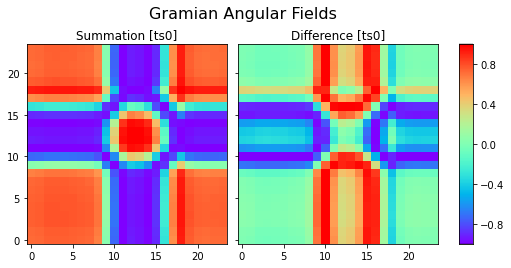

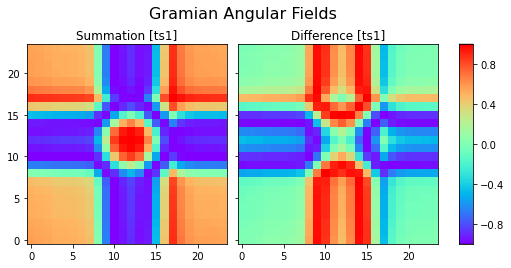

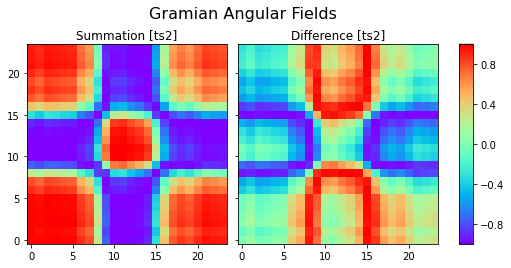

In [5]:
# Show the images for the first 3 time series
for i in range(3):
    fig = plt.figure(figsize=(8, 4))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(1, 2),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.3,
                     )
    images = [X_gasf[i], X_gadf[i]]
    titles = ['Summation [ts{}]'.format(i), 'Difference [ts{}]'.format(i)]
    for image, title, ax in zip(images, titles, grid):
        im = ax.imshow(image, cmap='rainbow', origin='lower')
        ax.set_title(title, fontdict={'fontsize': 12})
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
    plt.show()